# Generate networks for simulations

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
import random
import seaborn as sn

In [2]:
outdir = '../networks/'
if not os.path.exists(outdir):
    os.makedirs(outdir)

## Complete graph

In [ ]:
CG = nx.complete_graph(1000)

In [ ]:
nnodes = len(CG.nodes)
nx.write_edgelist(CG, f'./{outdir}/CG_N{nnodes}.edgelist', data=False)

## Random graph

In [5]:
random.seed(42)
ER = nx.erdos_renyi_graph(n=10000, p=0.001) # ~10 links per node

In [6]:
nnodes = len(ER.nodes)
nedges = len(ER.edges)
av_degree = 2*nedges/nnodes
nx.write_edgelist(ER, f'{outdir}/ER_N{nnodes}_k{round(av_degree)}.edgelist', data=False)

Average degree = 9.9444


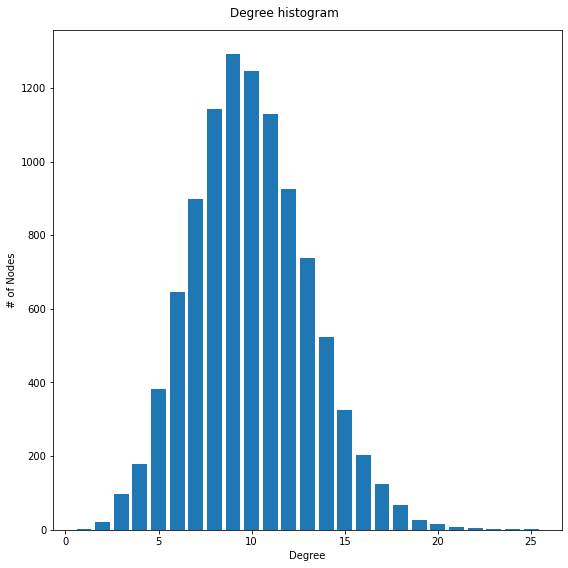

In [7]:
degree_sequence = sorted((d for n, d in ER.degree()), reverse=True)

print(f'Average degree = {np.mean(degree_sequence)}')

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.suptitle("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")

fig.tight_layout()
plt.show()

## Stochastic Block Model - Hierarchical Graph

In [8]:
ncom = 1000                              # number of communities
sizes=[round(10) for i in range(ncom)]   # size of each community
probs = np.zeros((ncom, ncom))           # connection probabilities between nodes of different communities
min_val = 0.001
for r in range(ncom):
    for c in range(r+1):
        probs[r,c] = max(np.random.normal(0.000015, 0.000001), min_val)
        probs[c,r] = probs[r,c]
        if r==c:
            probs[r,c] = max(np.random.normal(0.02, 0.01), min_val)
        elif np.floor(r/3) == np.floor(c/3):
            probs[r,c] = max(np.random.normal(0.008, 0.001), min_val)
            probs[c,r] = probs[r,c]

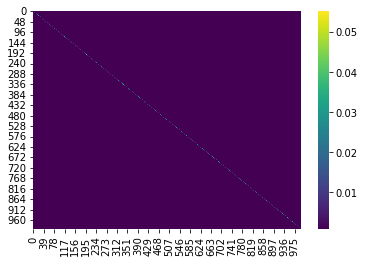

In [9]:
# plot connection probabilities
ax = sn.heatmap(probs, cmap='viridis')

In [10]:
# create the SBM graph
random.seed(42)
SBM = nx.stochastic_block_model(sizes=sizes, p=probs)

In [11]:
nnodes = len(SBM.nodes)
nedges = len(SBM.edges)
av_degree = 2*nedges/nnodes
nx.write_edgelist(SBM, f'{outdir}/SBM_N{nnodes}_k{round(av_degree)}.edgelist', data=False)

Average degree = 10.3652


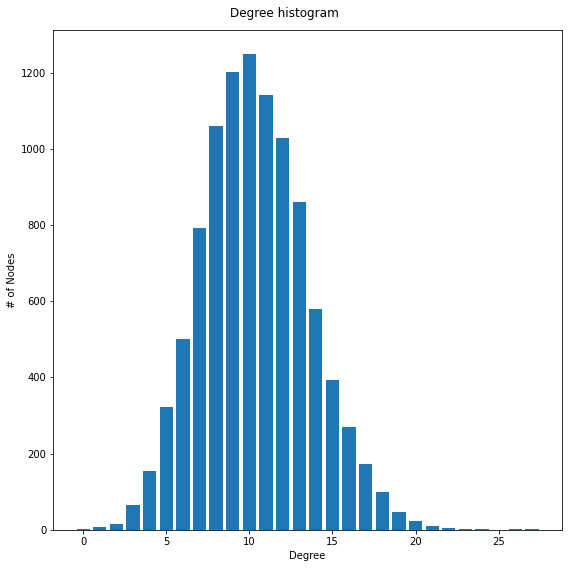

In [12]:
degree_sequence = sorted((d for n, d in SBM.degree()), reverse=True)

print(f'Average degree = {np.mean(degree_sequence)}')

fig = plt.figure("Degree of a hierarchical SBM", figsize=(8, 8))
plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.suptitle("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")

fig.tight_layout()
plt.show()

## Scale-free graph

In [13]:
random.seed(42)
SF = nx.powerlaw_cluster_graph(n = 10000, m = 5, p = 0.3)

In [14]:
nnodes = len(SF.nodes)
nedges = len(SF.edges)
av_degree = 2*nedges/nnodes
nx.write_edgelist(SF, f'{outdir}/SF_N{nnodes}_k{round(av_degree)}.edgelist', data=False)

Average degree = 9.9916


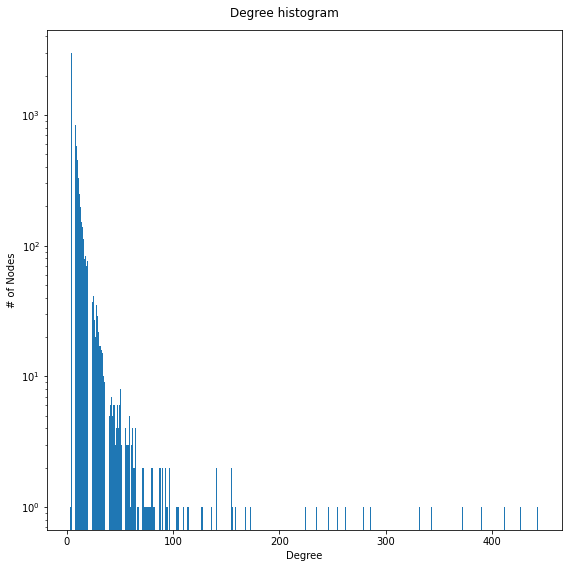

In [15]:
degree_sequence = sorted((d for n, d in SF.degree()), reverse=True)

print(f'Average degree = {np.mean(degree_sequence)}')

fig = plt.figure("Degree of a clustered PL", figsize=(8, 8))
plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.suptitle("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")
plt.yscale('log')

fig.tight_layout()
plt.show()